In [95]:
import scanpy
import phate
import matplotlib.pyplot as plt
import scprep
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import seaborn as sns
from scipy.stats import ranksums

In [34]:
adata_beta = scanpy.read_h5ad('../data/beta_run_2.h5ad')
all_adatas = scanpy.read_h5ad('results/all_mapped_human_datasets.h5ad')

In [ ]:
all_adatas.obsm['X_scmmgan_gene'] = pd.DataFrame(all_adatas.obsm['X_scmmgan_gene'],
                                                 index=all_adatas.obs_names,
                                                 columns=adata_beta.var['names'])

In [5]:
phate_op = phate.PHATE(random_state=42, n_components=3, verbose=False)
data_phate = phate_op.fit_transform(adata_beta.obsm['X_pca'])

/gpfs/gibbs/project/krishnaswamy_smita/av622/conda_envs/gspa/lib/python3.8/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [37]:
ref_data_phate = phate_op.transform(all_adatas.obsm['X_scmmgan_pca'])
all_adatas.obsm['X_scmmgan_phate'] = ref_data_phate

/gpfs/gibbs/project/krishnaswamy_smita/av622/conda_envs/gspa/lib/python3.8/site-packages/phate/phate.py:884: RuntimeWarning: Pre-fit PHATE should not be used to transform a new data matrix. Please fit PHATE to the new data by running 'fit' with the new data.
  warnings.warn(


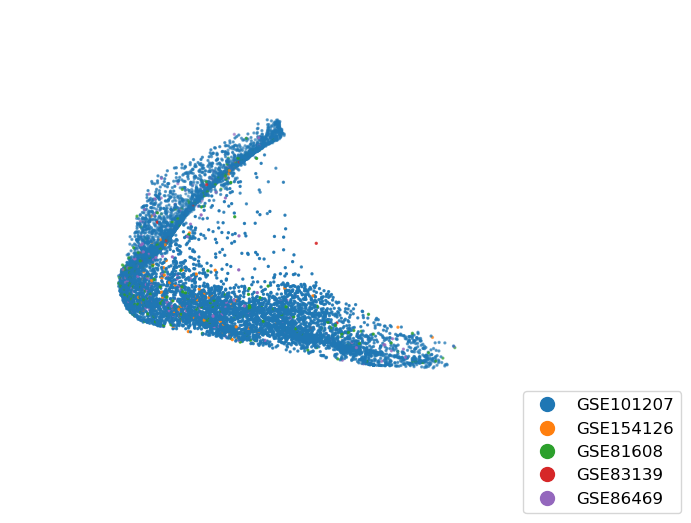

In [38]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
scprep.plot.scatter3d(ref_data_phate, c=all_adatas.obs['sample'], azim=-30, elev=50, ticks=None, legend_loc=(1.02, 0), ax=ax)
plt.tight_layout()
ax.axis('off')
fig.savefig('figures/all_human_mapped_sample.png', dpi=300)

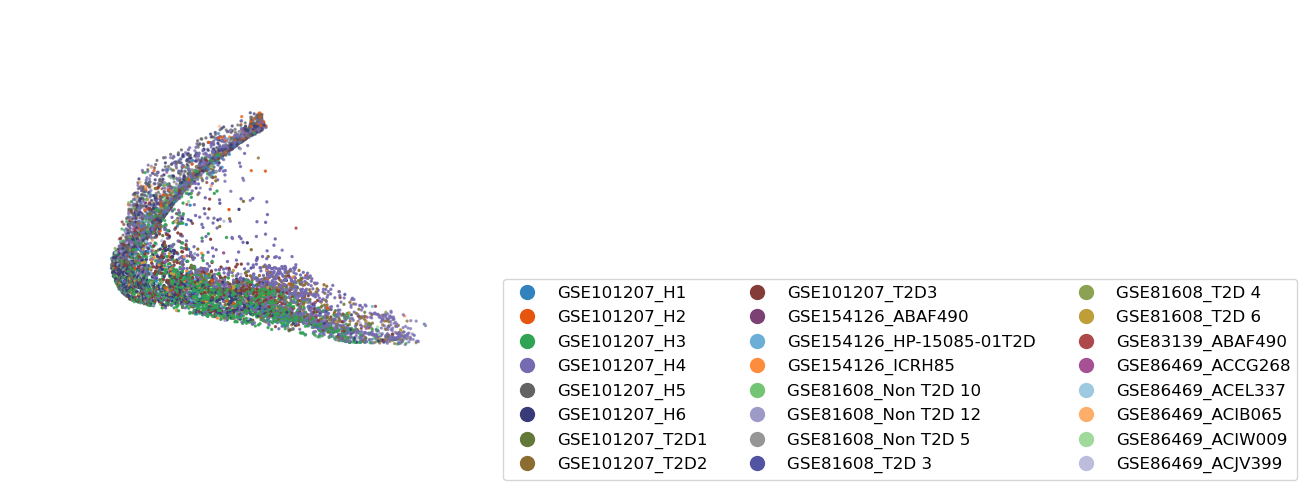

In [39]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111, projection='3d')
scprep.plot.scatter3d(ref_data_phate, c=all_adatas.obs['full_ID'], azim=-30, elev=50, ticks=None, legend_loc=(1.05, 0), ax=ax)
plt.tight_layout()
ax.axis('off')
fig.savefig('figures/all_human_mapped_full_ID.png', dpi=300)

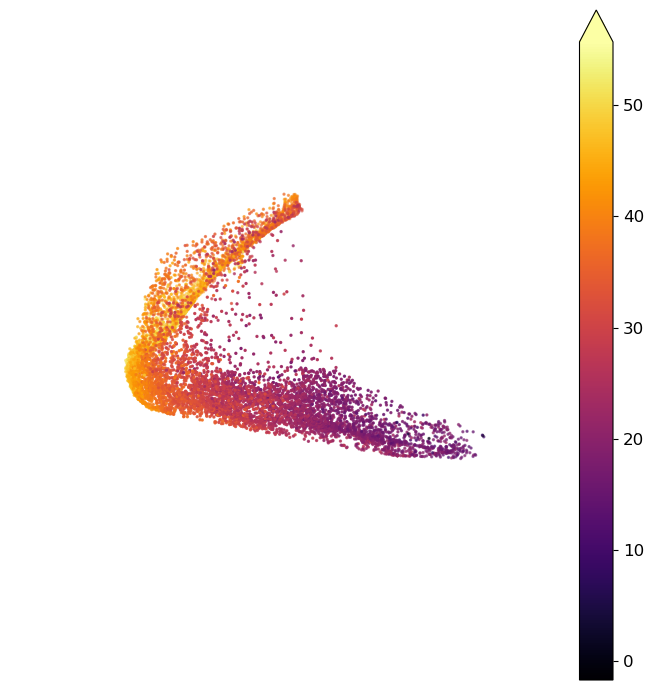

In [47]:
gene = 'Ins1'

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
scprep.plot.scatter3d(ref_data_phate, c=all_adatas.obsm['X_scmmgan_gene'][gene], ticks=None, legend_loc=(1.05, 0), ax=ax,
                      figsize=(9,4), azim=-30, elev=50, vmax=np.percentile(all_adatas.obsm['X_scmmgan_gene'][gene], 99))
plt.tight_layout()
ax.axis('off')
fig.savefig(f'figures/human_mapped_{gene}.png', dpi=300)

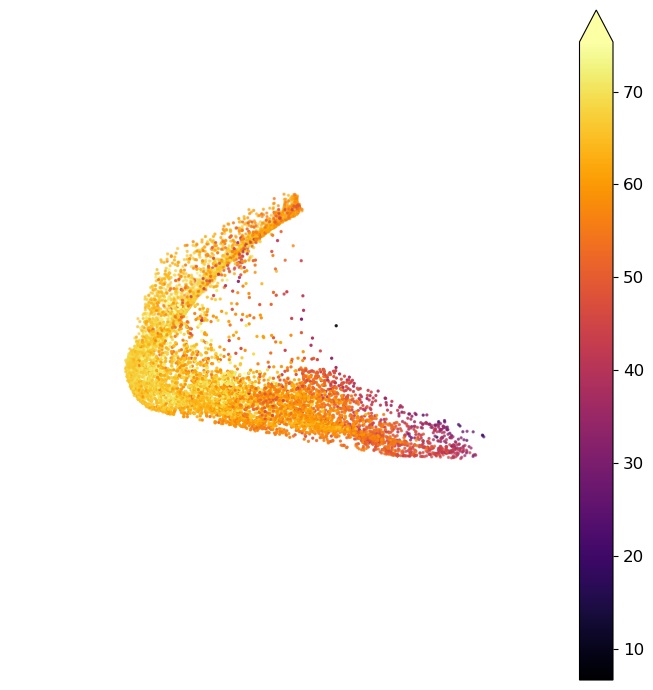

In [48]:
gene = 'Ins2'

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
scprep.plot.scatter3d(ref_data_phate, c=all_adatas.obsm['X_scmmgan_gene'][gene], ticks=None, legend_loc=(1.05, 0), ax=ax,
                      figsize=(9,4), azim=-30, elev=50, vmax=np.percentile(all_adatas.obsm['X_scmmgan_gene'][gene], 99))
plt.tight_layout()
ax.axis('off')
fig.savefig(f'figures/human_mapped_{gene}.png', dpi=300)

In [ ]:
gene = 'Ins1'

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
scprep.plot.scatter3d(ref_data_phate, c=all_adatas.obsm['X_scmmgan_gene'][gene], ticks=None, legend_loc=(1.05, 0), ax=ax,
                      figsize=(9,4), azim=-30, elev=50, vmax=np.percentile(all_adatas.obsm['X_scmmgan_gene'][gene], 99))
plt.tight_layout()
ax.axis('off')
fig.savefig(f'figures/human_mapped_{gene}.png', dpi=300)

In [49]:
INS = np.mean((all_adatas.obsm['X_scmmgan_gene']['Ins1']/all_adatas.obsm['X_scmmgan_gene']['Ins1'].sum(),
        all_adatas.obsm['X_scmmgan_gene']['Ins2']/all_adatas.obsm['X_scmmgan_gene']['Ins2'].sum()), axis=0)

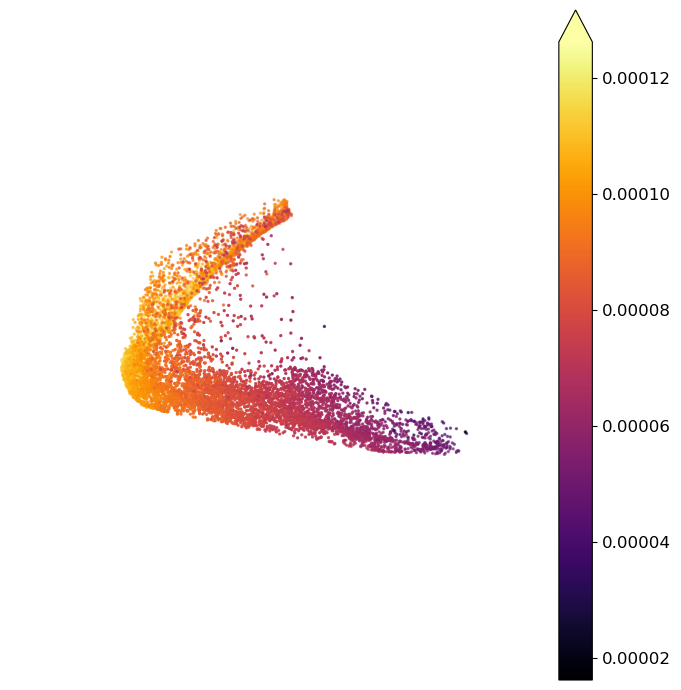

In [50]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
scprep.plot.scatter3d(ref_data_phate, c=INS, ticks=None, legend_loc=(1.05, 0), ax=ax,
                      figsize=(9,4), azim=-30, elev=50, vmax=np.percentile(INS, 99))
plt.tight_layout()
ax.axis('off')
fig.savefig('figures/human_mapped_INS.png', dpi=300)

In [111]:
all_adatas.obs['INS'] = INS

In [53]:
dist = cdist(all_adatas.obsm['X_scmmgan_pca'], adata_beta.obsm['X_pca'])
nearest_cell = np.argsort(dist)[:, :1]
all_adatas.obs['AT_committment'] = adata_beta.obs['AT_committment'].iloc[nearest_cell.flatten()].values

In [63]:
cmap = dict(zip(adata_beta.obs['AT_committment'].cat.categories, colors))
at_order = ['WT AT 1', 'WT AT 2', 'WT AT 3', 'WT AT 4', 'WT AT 5', 'WT AT 6', 'WT AT 7',
            'HFD AT 1', 'HFD AT 2', 'HFD AT 3', 'HFD AT 4', 'OB/OB AT 1', 'OB/OB AT 2', 'OB/OB AT 3', 'Uncommitted']
cmap = dict(zip(at_order, [cmap[key] for key in at_order]))

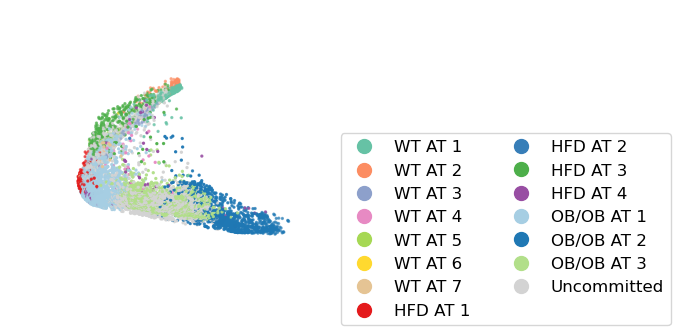

In [64]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
scprep.plot.scatter3d(ref_data_phate, c=all_adatas.obs['AT_committment'], ticks=None, legend_loc=(1.05, 0), ax=ax,
                      figsize=(9,4), cmap=cmap, azim=-30, elev=50,)
plt.tight_layout()
ax.axis('off')
fig.savefig('figures/all_human_mapped_at_committment.png', dpi=300)

In [65]:
sns.set_style('white')

In [85]:
nd_all_adatas = all_adatas[all_adatas.obs['isT2D'] == 0].obs
t2d_all_adatas = all_adatas[all_adatas.obs['isT2D'] == 1].obs

/tmp/ipykernel_3590290/1360599131.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


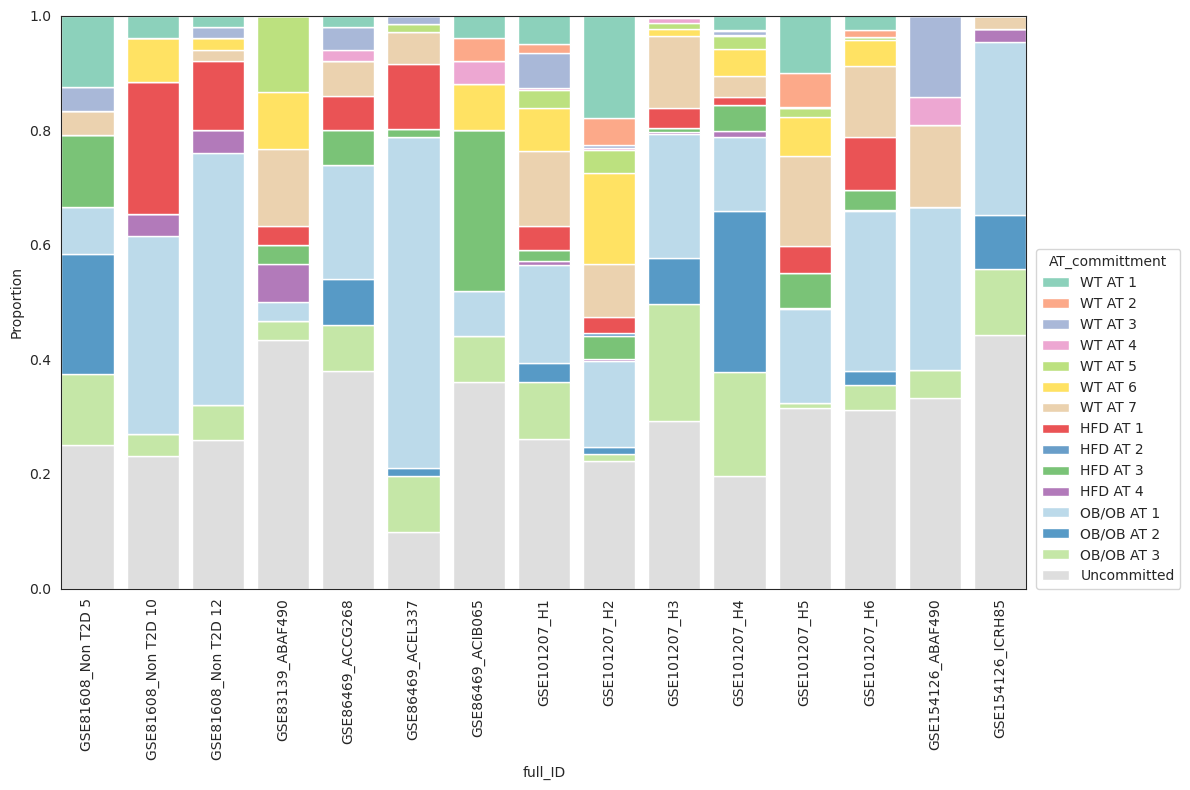

In [86]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(
    data=nd_all_adatas,
    x="full_ID", hue="AT_committment",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8, palette=cmap, hue_order=at_order,
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.move_legend(ax, (1.01, 0))
plt.tight_layout()
fig.savefig('figures/nd_archetypal_proportions.png', dpi=300)

/tmp/ipykernel_3590290/4138230433.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


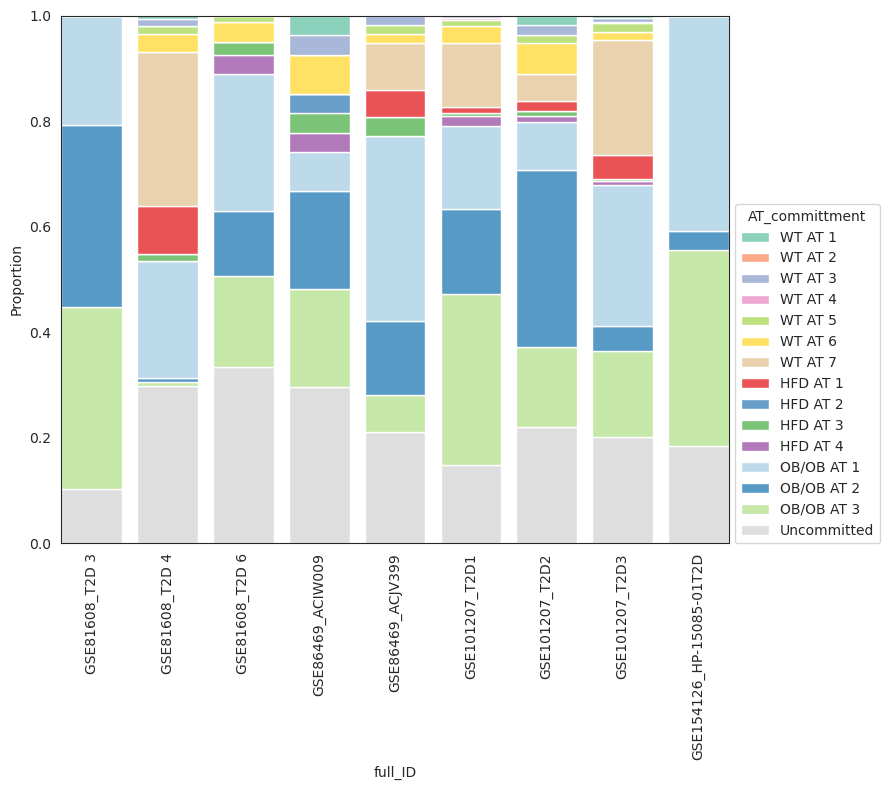

In [88]:
fig = plt.figure(figsize=(9,8))
ax = sns.histplot(
    data=t2d_all_adatas,
    x="full_ID", hue="AT_committment",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8, palette=cmap, hue_order=at_order,
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.move_legend(ax, (1.01, 0))
plt.tight_layout()
fig.savefig('figures/t2d_archetypal_proportions.png', dpi=300)

In [91]:
all_proportions = pd.DataFrame(index=at_order)
for id in nd_all_adatas['full_ID'].unique():
    df = pd.DataFrame(index=at_order).join(other=nd_all_adatas[nd_all_adatas['full_ID'] == id]['AT_committment'].value_counts())
    df.columns = [id]
    all_proportions = pd.concat((all_proportions, df),axis=1 )
nd_all_proportions = all_proportions.fillna(0)
nd_all_proportions = (nd_all_proportions/nd_all_proportions.sum(axis=0))

In [92]:
all_proportions = pd.DataFrame(index=at_order)
for id in t2d_all_adatas['full_ID'].unique():
    df = pd.DataFrame(index=at_order).join(other=t2d_all_adatas[t2d_all_adatas['full_ID'] == id]['AT_committment'].value_counts())
    df.columns = [id]
    all_proportions = pd.concat((all_proportions, df),axis=1 )
t2d_all_proportions = all_proportions.fillna(0)
t2d_all_proportions = (t2d_all_proportions/t2d_all_proportions.sum(axis=0))

## WT AT1, OBOB 2, and OBOB 3 are significantly different between ND and T2D human

In [93]:
nd_N = nd_all_proportions.shape[1]
t2d_N = t2d_all_proportions.shape[1]

In [96]:
for at in nd_all_proportions.index:
    pval = ranksums(nd_all_proportions.loc[at], t2d_all_proportions.loc[at]).pvalue
    if (pval < 0.05):
        print (at, pval)

WT AT 1 0.04576502804201557
OB/OB AT 2 0.01573722226631099
OB/OB AT 3 0.025347318677468252


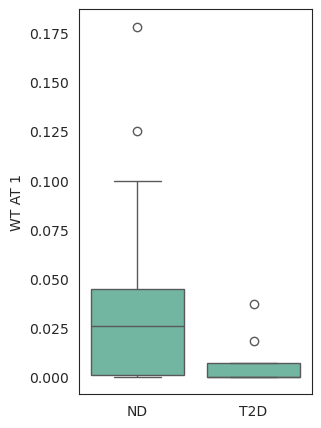

In [97]:
fig = plt.figure(figsize=(3,5))
at = 'WT AT 1'
props = pd.concat([nd_all_proportions.loc[at], t2d_all_proportions.loc[at]])
ax = sns.boxplot(x=['ND']*nd_all_proportions.shape[1] + ['T2D']*t2d_all_proportions.shape[1], y=props, color=cmap[at])
fig.savefig('figures/WT_AT_1_proportions_boxplot.png', dpi=300)

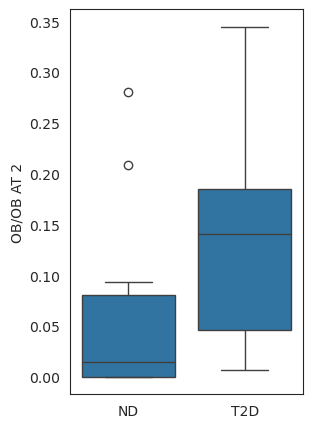

In [98]:
fig = plt.figure(figsize=(3,5))
at = 'OB/OB AT 2'
props = pd.concat([nd_all_proportions.loc[at], t2d_all_proportions.loc[at]])
ax = sns.boxplot(x=['ND']*nd_all_proportions.shape[1] + ['T2D']*t2d_all_proportions.shape[1], y=props, color=cmap[at])
fig.savefig('figures/OB_OB_AT_2_proportions_boxplot.png', dpi=300)

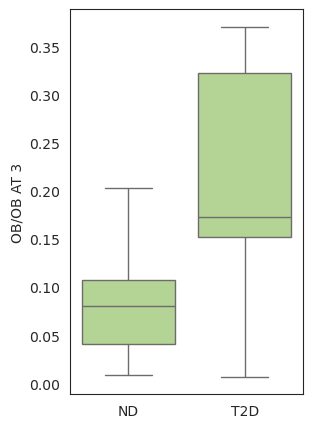

In [99]:
fig = plt.figure(figsize=(3,5))
at = 'OB/OB AT 3'
props = pd.concat([nd_all_proportions.loc[at], t2d_all_proportions.loc[at]])
ax = sns.boxplot(x=['ND']*nd_all_proportions.shape[1] + ['T2D']*t2d_all_proportions.shape[1], y=props, color=cmap[at])
fig.savefig('figures/OB_OB_AT_3_proportions_boxplot.png', dpi=300)

## All archetypes present in at least 1 ND human, all archetypes except WT AT 2 present in at least 1 T2D. Most archetypes present in multiple patients

In [100]:
nd_df = ((nd_all_proportions > 0).mean(axis=1) * 100).reset_index()

/tmp/ipykernel_3590290/3508170748.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(nd_df, y='index', x=0, palette=cmap, orient='h')
/tmp/ipykernel_3590290/3508170748.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


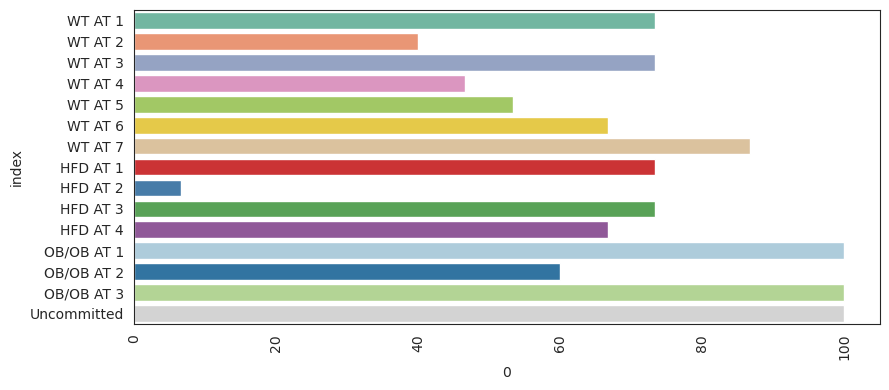

In [101]:
fig = plt.figure(figsize=(9,4))
ax = sns.barplot(nd_df, y='index', x=0, palette=cmap, orient='h')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
fig.savefig('figures/nd_number_of_samples_with_at.png', dpi=300)

In [102]:
t2d_df = ((t2d_all_proportions > 0).mean(axis=1) * 100).reset_index()

/tmp/ipykernel_3590290/999358603.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(t2d_df, y='index', x=0, palette=cmap, orient='h')
/tmp/ipykernel_3590290/999358603.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


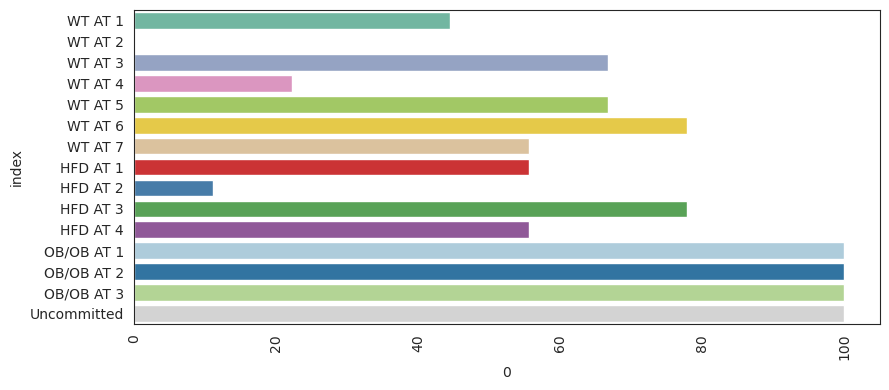

In [103]:
fig = plt.figure(figsize=(9,4))
ax = sns.barplot(t2d_df, y='index', x=0, palette=cmap, orient='h')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
fig.savefig('figures/t2d_number_of_samples_with_at.png', dpi=300)

In [117]:
all_adatas.obsm['X_scmmgan_gene'] = all_adatas.obsm['X_scmmgan_gene'].values # convert to array for saving object (d
all_adatas.write('results/all_mapped_human_datasets.h5ad', compression='gzip')